First of all, a few notes:
* Check the first homework for a quick reminder on general rules.
* As before, no code hints. We trust your skills (if in doubt - check the seminar notebook).

Remember to submit the feedback! Especially if the homework was too difficult or easy for you.

# Introduction [1.0]




## scRNA-seq

We **must** know our data before doing the analysis. To ease your life, [here](https://www.singlecellcourse.org/introduction-to-single-cell-rna-seq.html) is an excellent state-of-the-art description of the scRNA-seq experiments. Read it and answer the following questions:

* [0.2] What is single-cell RNA-seq and how does it compare to bulk RNA-seq?

→

* [0.2] What are some of the typical applications of scRNA-seq?

→

* [0.2] What experimental design choices should be considered in scRNA-seq?

→

* [0.2] What are some of the challenges of scRNA-seq data compared to bulk data?

→

## Target experiment

To move on, you need to find/choose and download your favorite scRNA-seq dataset. Similar to what we did during the workshop, but everyone will have their own data to make it more fun.

See, for example, public [10x datasets](https://www.10xgenomics.com/resources/datasets?menu%5Bproducts.name%5D=Single%20Cell%20Gene%20Expression&query=&page=1&configure%5Bfacets%5D%5B0%5D=chemistryVersionAndThroughput&configure%5Bfacets%5D%5B1%5D=pipeline.version&configure%5BhitsPerPage%5D=50&configure%5BmaxValuesPerFacet%5D=1000&refinementList%5Bproduct.name%5D%5B0%5D=Single%20Cell%20Gene%20Expression) or [GEO](https://www.ncbi.nlm.nih.gov/gds/?term=scRNA-seq). Subsample cells or use more strict thresholds if the computations are too long.

[0.2] Please provide a brief description of the chosen dataset. I.e., what was the purpose of the original study, what is the protocol, and so on. Insert link to the dataset.

**Note**: To avoid a situation where multiple students have selected the same dataset, write the name of the dataset and attach a link to it in [this google sheet](https://docs.google.com/spreadsheets/d/1iJ0SJyYbmq38AIBNg723iyRE-aYfO0SfujpEw2hm3kg/edit?usp=sharing). This is not mandatory, and is only needed to ensure that some other student will not accidentaly pick the same dataset.

→

# Main flow [7.5]

Simple and tedious, you need to repeat the seminar results with your data and implement some algorithms by hand.

* [2.5] Repeat the main workflow: load & preprocess the data -> calculate PCA, UMAP, t-SNE -> color cells using K-means / Agg. Clustering / Leiden algorithms.

* [1.5] Make several plots showing how the representation of data is changing for UMAP & t-SNE by tweaking parameters of those algorithms. For the representation of your choice, find optimal number of clusters by tweaking `n_clusters` in K-means and `resolution` in Leiden algorithm. What was the optimal number of clusters for your dataset? Justify your choice.

* [1] Analyze your clusters and identify if any of them is an outlier in terms of technical scRNA characteristics, such as: number of genes per cell, percentage of mitochondrial expression. Make relevant visualizations.

* [1] Visualize `10` top expressed genes in each cluster. To do this, make use of:
1. `sc.tl.rank_genes_groups` to rank genes for characterizing groups (cluster labels).
2. `sc.pl.rank_genes_groups` to plot ranking of genes for each cluster.
3. `sc.pl.rank_genes_groups_heatmap` to plot ranking of genes using heatmap plot.\
Instead of the heatmap, you might want to use some other visualization that you find most fitting. You can use [this tutorial](https://scanpy-tutorials.readthedocs.io/en/latest/plotting/core.html) to find more info about scanpy plotting functions.

* [1.5] Do one of the following:
  * Either provide formal algorithm and implementation of K-means with random initialization by hand, describe results, and compare them to the sklearn implementation.
  * Or do the same for PCA.\
    *Note that completing both assignments does NOT result in [3.0] points.* - :(

# Скачиваем данные, устанавливаем необходимые библиотеки

In [ ]:
! wget https://cf.10xgenomics.com/samples/cell-exp/6.1.0/20k_PBMC_3p_HT_nextgem_Chromium_X/20k_PBMC_3p_HT_nextgem_Chromium_X_filtered_feature_bc_matrix.tar.gz

--2023-12-10 01:21:07--  https://cf.10xgenomics.com/samples/cell-exp/6.1.0/20k_PBMC_3p_HT_nextgem_Chromium_X/20k_PBMC_3p_HT_nextgem_Chromium_X_filtered_feature_bc_matrix.tar.gz
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 104.18.1.173, 104.18.0.173, 2606:4700::6812:ad, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.1.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 209851553 (200M) [application/x-tar]
Saving to: ‘20k_PBMC_3p_HT_nextgem_Chromium_X_filtered_feature_bc_matrix.tar.gz’

20k_PBMC_3p_HT_next 100%[===================>] 200.13M   208MB/s    in 1.0s    

2023-12-10 01:21:08 (208 MB/s) - ‘20k_PBMC_3p_HT_nextgem_Chromium_X_filtered_feature_bc_matrix.tar.gz’ saved [209851553/209851553]



In [ ]:
! tar -xzf 20k_PBMC_3p_HT_nextgem_Chromium_X_filtered_feature_bc_matrix.tar.gz

In [ ]:
# current plt is not supported by the scanpy
!python3 -m pip uninstall -y matplotlib
!python3 -m pip install matplotlib==3.6.3 scanpy

Found existing installation: matplotlib 3.7.1
Uninstalling matplotlib-3.7.1:
  Successfully uninstalled matplotlib-3.7.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.2/119.2 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 4.2 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=e3c22f7a391825077f622585ab832a0aff9cbccdf226b918554b361359c015a5
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
  Created wheel for session-info: filename=sessio

# Работа с данными

In [ ]:
!ls filtered_feature_bc_matrix

barcodes.tsv.gz  features.tsv.gz  matrix.mtx.gz


In [ ]:
import scanpy as sc

# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.verbosity = 3

adata = sc.read_10x_mtx(
    'filtered_feature_bc_matrix',  # the directory with the `.mtx` file
    var_names='gene_symbols',      # use gene symbols for the variable names (variables-axis index)
    cache=True                     # write a cache file for faster subsequent reading
)
# Make all gene names unique (symbols MUST be unique by but in reality...)
adata.var_names_make_unique()

adata

... writing an h5ad cache file to speedup reading next time


AnnData object with n_obs × n_vars = 23837 × 36601
    var: 'gene_ids', 'feature_types'

In [ ]:
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)

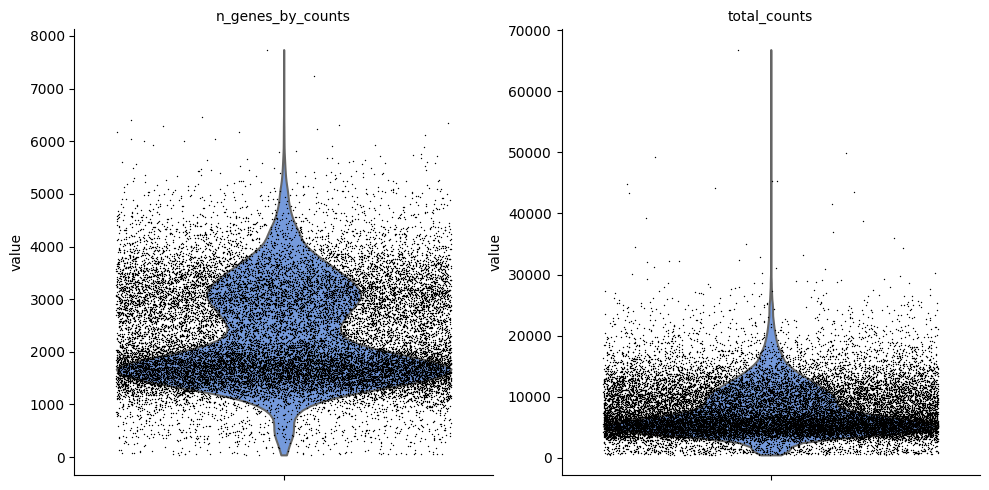

In [ ]:
# Plot the result
sc.pl.violin(
    adata,
    ['n_genes_by_counts', 'total_counts'],
    jitter=0.4,
    multi_panel=True,
    scale="width",
    palette=['cornflowerblue']

)

In [ ]:
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=10)
adata

filtered out 42 cells that have less than 100 genes expressed
filtered out 15857 genes that are detected in less than 10 cells


AnnData object with n_obs × n_vars = 23795 × 20744
    obs: 'n_genes_by_counts', 'total_counts', 'n_genes'
    var: 'gene_ids', 'feature_types', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

In [ ]:
mask = adata.var_names.str.startswith('MT-')
print(f"Mito genes: {adata.var_names[mask].tolist()}")

adata.var['mt'] = mask

Mito genes: ['MT-ND1', 'MT-ND2', 'MT-CO1', 'MT-CO2', 'MT-ATP8', 'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4L', 'MT-ND4', 'MT-ND5', 'MT-ND6', 'MT-CYB']


In [ ]:
sc.pp.calculate_qc_metrics(adata,
                           qc_vars=['mt'],
                           percent_top=None,
                           log1p=False,
                           inplace=True
                           )

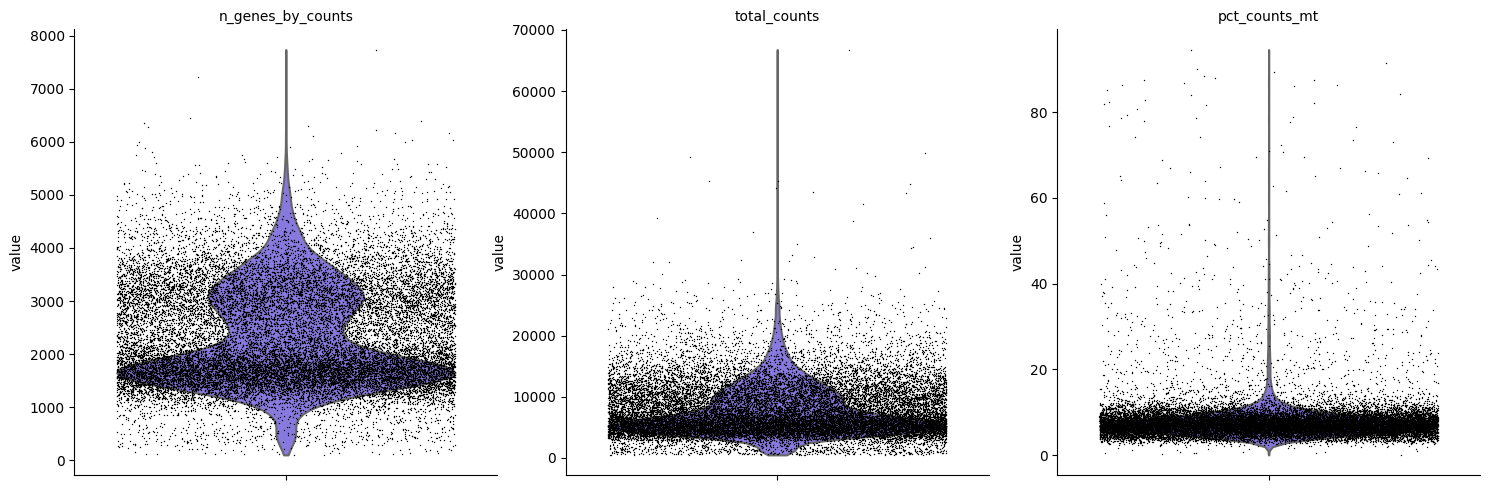

In [ ]:
sc.pl.violin(
    adata,
    ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
    jitter=0.4,
    multi_panel=True,
    scale="width",
    palette=['mediumslateblue']
)

По графикам видно, что концентрация данных для n_genes_by_counts приходится на значения <4 000, для total_counts можно взять <15 000 (вообще, основное скопление при <10 000, но не хочется отсеивать слишком много данных), для pct_counts_mt оптимальным будет взять <15

In [ ]:
# Apply filters
adata = adata[adata.obs.n_genes_by_counts < 4_000, :]
adata = adata[adata.obs.total_counts < 15_000, :]
adata = adata[adata.obs.pct_counts_mt < 15, :]
adata

View of AnnData object with n_obs × n_vars = 21507 × 20744
    obs: 'n_genes_by_counts', 'total_counts', 'n_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'mt'

In [ ]:
# Normalize the data to CPM & take the log
sc.pp.normalize_total(adata, target_sum=1e6) # sum(cell counts) = 1e6
sc.pp.log1p(adata)

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:01)


In [ ]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=7, min_disp=0.5)

extracting highly variable genes
    finished (0:00:12)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


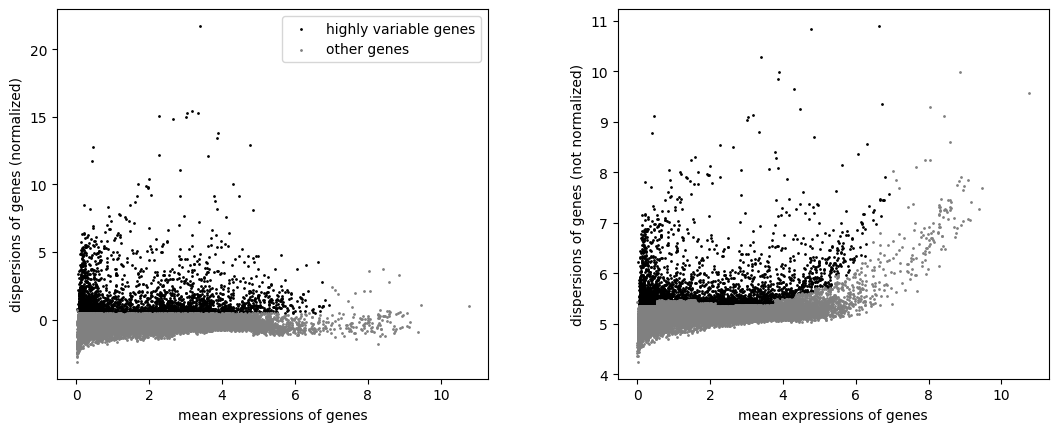

In [ ]:
sc.pl.highly_variable_genes(adata)

In [ ]:
adata = adata[:, adata.var.highly_variable]
adata

View of AnnData object with n_obs × n_vars = 21507 × 3125
    obs: 'n_genes_by_counts', 'total_counts', 'n_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'mt', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [ ]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:01:16)


In [ ]:
sc.pp.scale(adata, max_value=10) # clip values > 10

# Снижение размерности

In [ ]:
import numpy as np
# Subsample to speed up the analysis
ind = np.random.choice(np.arange(len(adata.X)), 2_000, replace=False)

X = adata.X[ind].copy()
print(f"Cells vs Genes: {X.shape}")

Cells vs Genes: (2000, 3125)


In [ ]:
from sklearn.manifold import Isomap, MDS, TSNE, SpectralEmbedding, LocallyLinearEmbedding
from sklearn.decomposition import PCA

# Set of models to work with
embeddings = {
    "Isomap embedding": Isomap(n_components=2),
    "MDS embedding": MDS(n_components=2, n_init=1, max_iter=100),
    "t-SNE embedding": TSNE(n_components=2, init='pca', learning_rate='auto', random_state=42),
    "Spectral embedding": SpectralEmbedding(n_components=2, random_state=32),
    "LLE embedding": LocallyLinearEmbedding(n_components=2, method="modified"),
    "PCA": PCA(n_components=2)
}

In [ ]:
import warnings
warnings.filterwarnings('ignore')

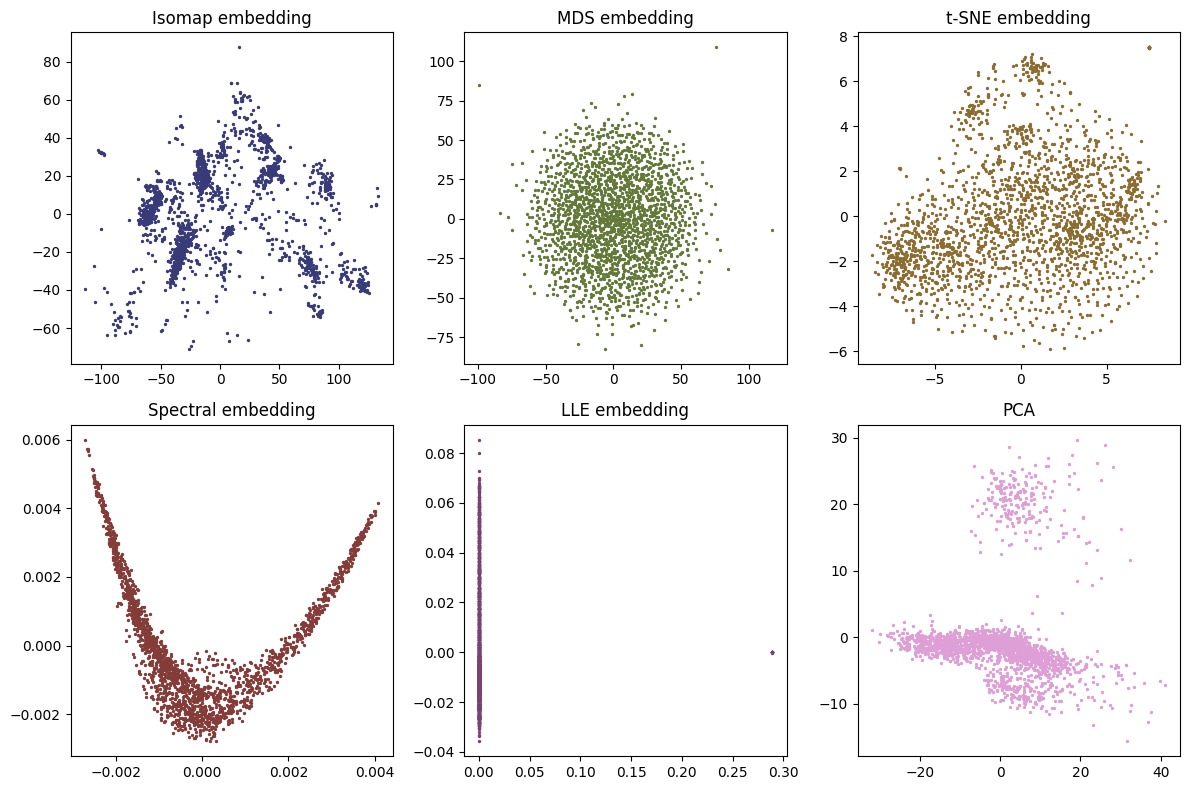

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.ravel()

assert len(axes) == len(embeddings)

color_map = plt.cm.get_cmap('tab20b', len(embeddings))
colors = color_map(range(len(embeddings)))

for ax, ((name, model), color) in zip(axes, zip(embeddings.items(), colors)):
    ax.set_title(name)
    transformed = model.fit_transform(X)
    ax.scatter(transformed[:, 0], transformed[:, 1], s=2, c=[color])

plt.tight_layout()
plt.show()

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:26)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:01:19)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:21)


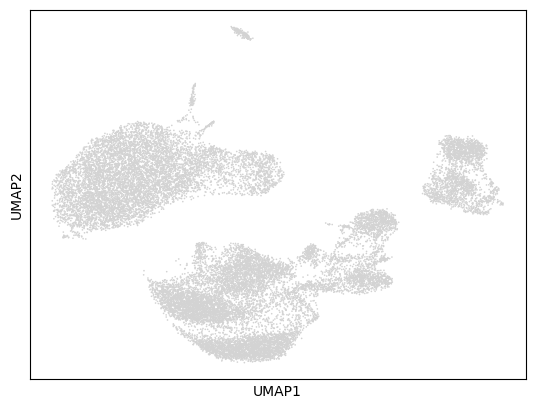

In [ ]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:25)


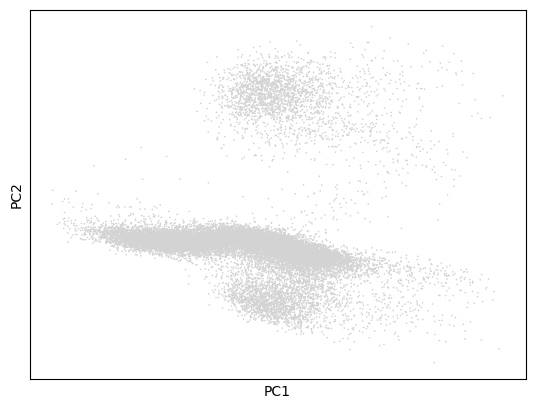

In [ ]:
sc.tl.pca(adata)
sc.pl.pca(adata)

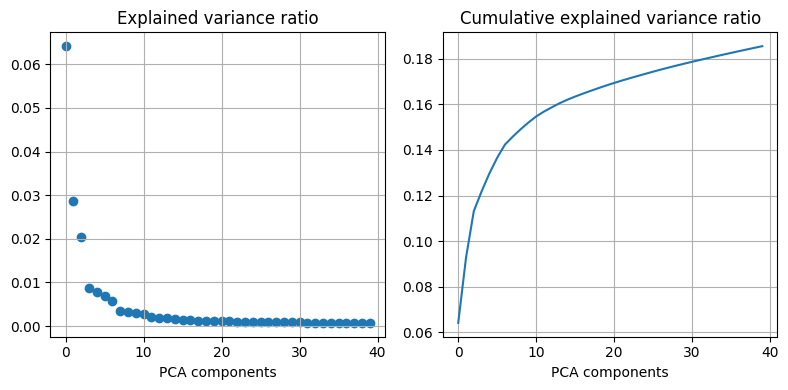

In [ ]:
pca = PCA(n_components=40, random_state=123).fit(adata.X)
fig, axes = plt.subplots(1, 2, sharex=True, figsize = (8, 4))

axes[0].scatter(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
axes[0].set_title("Explained variance ratio")

cumulative = np.cumsum(pca.explained_variance_ratio_)
axes[1].plot(cumulative)
axes[1].set_title("Cumulative explained variance ratio")

for ax in axes:
  ax.grid()
  ax.set_xlabel("PCA components")

fig.tight_layout()
fig.show()

# Бейзлайновая кластеризация

In [ ]:
# Subsample to speed up the analysis
sample = sc.pp.subsample(adata, n_obs=5_000, copy=True)
sample

AnnData object with n_obs × n_vars = 5000 × 3125
    obs: 'n_genes_by_counts', 'total_counts', 'n_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'mt', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'neighbors', 'umap', 'pca'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering

# Cluster elements
algorithms = [
    ("K-means", KMeans(n_clusters=10, random_state=12)),
    ("Agglomerative Clustering", AgglomerativeClustering(n_clusters=10))
]

for name, algo in algorithms:
  print(name)
  clustering = algo.fit(sample.X)
  sample.obs[name] = clustering.labels_
  # -> category dtype
  sample.obs[name] = sample.obs[name].astype('category')

K-means
Agglomerative Clustering


In [ ]:
!python3 -m pip install leidenalg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 89.5 MB/s eta 0:00:00


In [ ]:
# Recalculate neighbors & the UMAP
sc.pp.neighbors(sample)
sc.tl.umap(adata)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:36)


In [ ]:
# Run the Leiden clustering
sc.tl.leiden(sample, resolution=0.5)

running Leiden clustering
    finished: found 11 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:03)


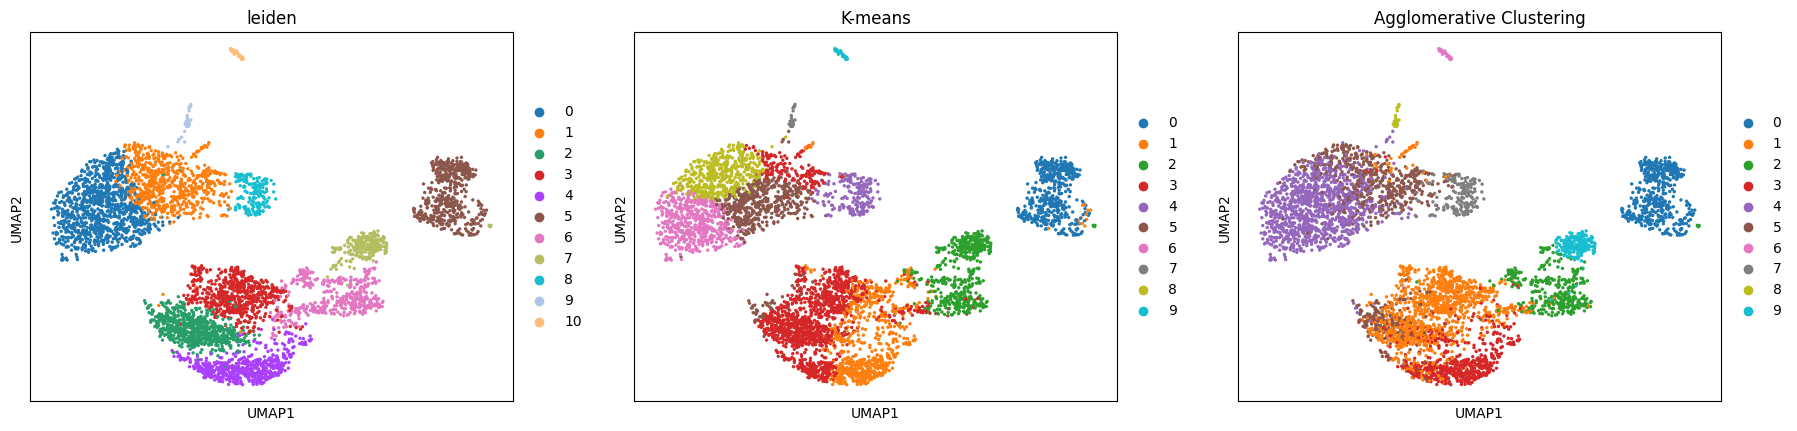

In [ ]:
sc.pl.umap(
    sample,
    color=['leiden', 'K-means', 'Agglomerative Clustering']
)

In [ ]:
# посчитаем Silhouette Score
from sklearn.metrics import silhouette_score
def comp_SC():
  umap_embeddings = sample.obsm['X_umap']
  cluster_labels = sample.obs['leiden']
  silhouette_avg = silhouette_score(umap_embeddings, cluster_labels)
  print(f'Avg Silhouette Score for UMAP clusters: {silhouette_avg:.4f}')

In [ ]:
comp_SC()

Avg Silhouette Score for UMAP clusters: 0.4142


Кластеризация leiden показывает неплохой результат -- группы не накладываются друг на друга, есть четкие границы кластеров

# Тьюним параметры

Параметры UMAP:

-  n_components – размерность итоговых данных. Для двухмерного представления необходимо установить значение 2, для трехмерного, соответственно, 3.
Его я не буду брать для наших данных, нет смысла переводить в трехмерное пространство, это осложнит интерпретацию для нашего случая.

- n_neighbors – определяет работу алгоритма с глобальной структурой данных. Значение по умолчанию установлено 15. Чем большая величина задается, тем большее количество соседних значений рассматривает UMAP, то есть смещает свое внимание с локальной структуры данных в пользу глобальной. Стоит взять значение больше и меньше дефолтного, чтобы посмотреть, как это скажется на данных.

- min_dist – параметр задает минимальное расстояние для точек в итоговом представлении меньшей размерности. По умолчанию величина 0.1. При устремлении параметра к нулю алгоритм начинает искать различия внутри полученных кластеров. При увеличении – внутренние различия стираются и структура данных представляется в виде единого целого.

n_components я не вижу смысла менять, поэтому попробую подобрать n-neighbours и min_dist

In [ ]:
n_neighborss = [10, 20, 30, 40, 50]
min_dists = [0.1, 0.3, 0.6, 0.8, 0.9]
s = 0
for n in n_neighborss:
  sc.tl.leiden(sample, resolution=0.1)
  sc.pp.neighbors(sample, n_neighbors=n)
  sc.tl.umap(adata, min_dist=min_dists[s])
  comp_SC()
  print(f"Params: min_dist={min_dists[s]}, n_neighbors={n}")
  print('-------------')
  s+=1

running Leiden clustering
    finished: found 7 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:05)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:23)
Avg Silhouette Score for UMAP clusters: 0.4783
Params: min_dist=0.1, n_neighbors=10
-------------
running Leiden clustering
    finished: found 7 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:23)


Возьмем параметры, основываясь на Avg Silhouette Score,  min_dist=0.8, n_neighbors=40 и визуализируем

running Leiden clustering
    finished: found 5 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:03)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:18)


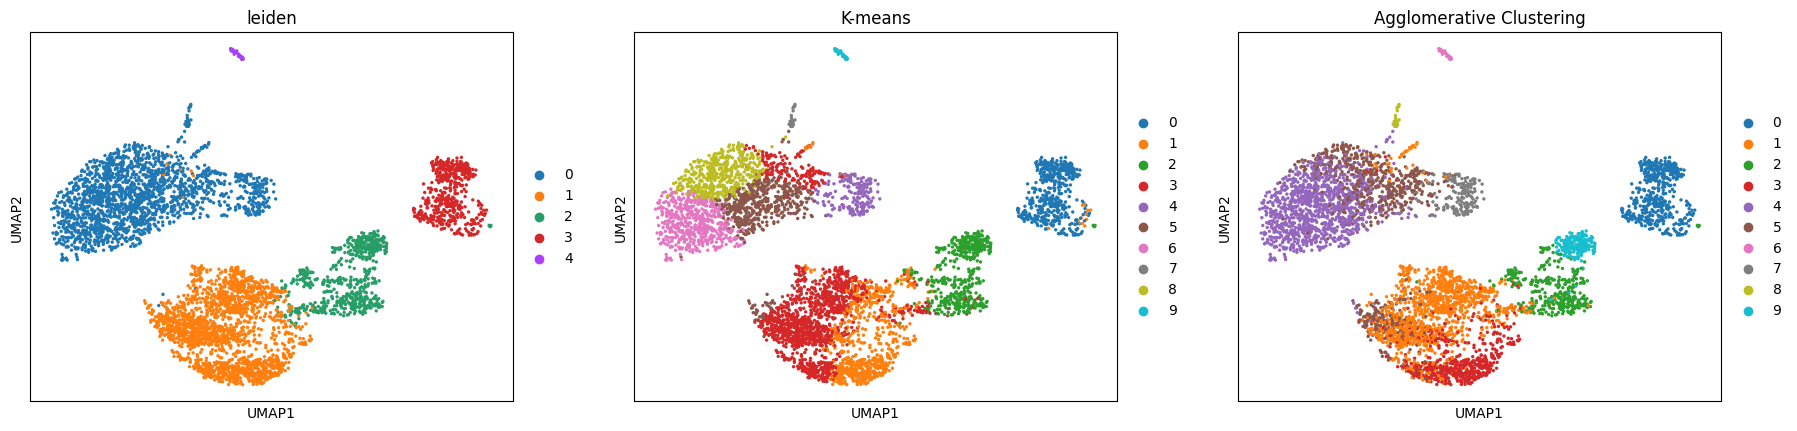

In [ ]:
sc.tl.leiden(sample, resolution=0.1)
sc.pp.neighbors(sample, n_neighbors=40)
sc.tl.umap(adata, min_dist=0.8)
sc.pl.umap(
    sample,
    color=['leiden', 'K-means', 'Agglomerative Clustering']
)

In [ ]:
comp_SC()

Avg Silhouette Score for UMAP clusters: 0.5510


**Для leiden подбираем оптимальное значение resolution**

In [ ]:
umap_embeddings = sample.obsm['X_umap']
cluster_labels = sample.obs['leiden']

running Leiden clustering
    finished: found 5 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:03)
Resolution: 0.1, Silhouette Score: 0.548263669013977
running Leiden clustering
    finished: found 7 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:04)
Resolution: 0.2, Silhouette Score: 0.48276153206825256
running Leiden clustering
    finished: found 8 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:03)
Resolution: 0.3, Silhouette Score: 0.437824547290802
running Leiden clustering
    finished: found 9 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:05)
Resolution: 0.4, Silhouette Score: 0.43250948190689087
running Leiden clustering
    finished: found 10 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:05)
Resolution: 0.5, Silhouette Score: 0.43989744782447815
running Leiden clustering
    finished: found 11 clus

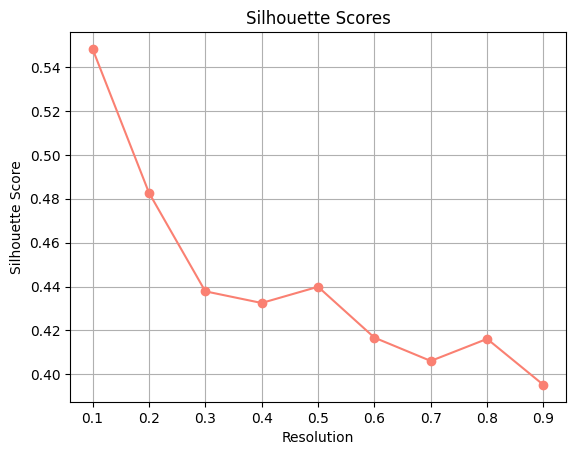

In [ ]:
resolutions = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
silhouette_scores = []
for resolution in resolutions:
    sc.tl.leiden(sample, resolution=resolution)
    sil_score = silhouette_score(umap_embeddings, sample.obs['leiden'])
    silhouette_scores.append(sil_score)
    print(f'Resolution: {resolution}, Silhouette Score: {sil_score}')


plt.plot(resolutions, silhouette_scores, 'o-', color='salmon')
plt.title('Silhouette Scores')
plt.xlabel('Resolution')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

Видим, что самый оптимальный - дефолтный 0.1

**Для K-means и Agglomerative Clustering подбираем количество кластеров**

Для реализации алгоритма необходимо выбрать оптимальное количество кластеров, для чего были разработаны специальные метрики. Один из наиболее популярных – это “метод локтя”.

Метод основан на вычислении суммы квадратов ошибок внутри кластера для различного числа кластеров (k) и выборе k, для которых изменение WSS сначала начинает уменьшаться [(Umargono et al. 2020)](https://www.researchgate.net/publication/346349075_K-Means_Clustering_Optimization_Using_the_Elbow_Method_and_Early_Centroid_Determination_Based_on_Mean_and_Median_Formula)

Несмотря на популярность метода, он довольно часто подвергается критике. Так, например, в работе [Schubert 2022](https://arxiv.org/abs/2212.12189) автор утверждает, что, как минимум, нет четкого определения локтя – нет значимого измерения угла, и изменение масштаба осей (и, например, диапазона параметров k)

Индекс Calinski-Harabasz основан на идее о том, что кластеры хорошие, если они компактны и имеют четкие границы между собой. Чем выше значение индекса, тем лучше кластеризация. Поэтому для выбора количества кластеров я буду использовать его

In [ ]:
algorithms

[('K-means', KMeans(n_clusters=10, random_state=12)),
 ('Agglomerative Clustering', AgglomerativeClustering(n_clusters=10))]

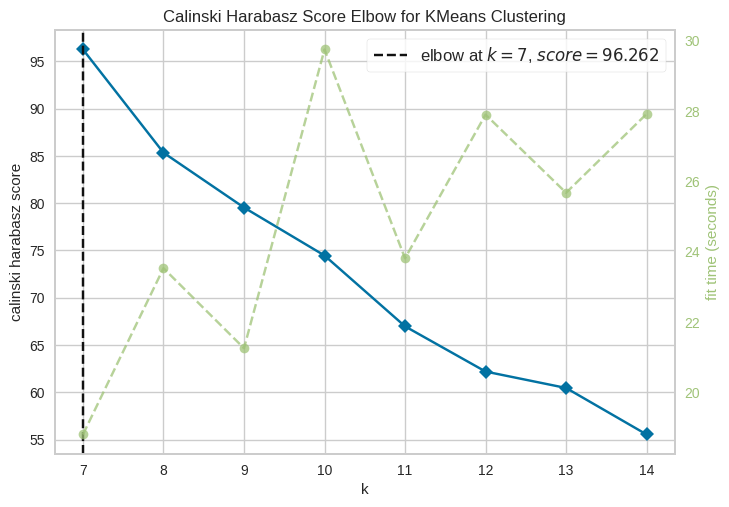

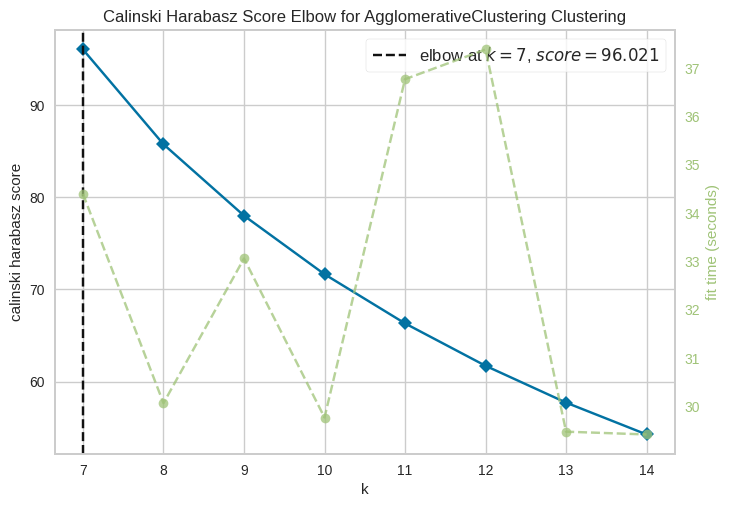

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
X_subset = sample.X
# оно работает долго, но очень надеюсь, что стоит того....
for name, algo in algorithms:
  visualizer = KElbowVisualizer(algo, k=(7,15), metric='calinski_harabasz', timings=True)
  visualizer.fit(X_subset)
  visualizer.show()

Снизим количество кластеров с 10 до 7

Посмотрим на кластеры и Silhouette Score, обновив параметры

min_dist=0.8, n_neighbors=40 и кол-во кластеров = 7

In [ ]:
algorithms = [
    ("K-means", KMeans(n_clusters=7, random_state=12)),
    ("Agglomerative Clustering", AgglomerativeClustering(n_clusters=7))
]

for name, algo in algorithms:
  print(name)
  clustering = algo.fit(sample.X)
  sample.obs[name] = clustering.labels_
  sample.obs[name] = sample.obs[name].astype('category')

K-means
Agglomerative Clustering


running Leiden clustering
    finished: found 5 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:03)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:20)


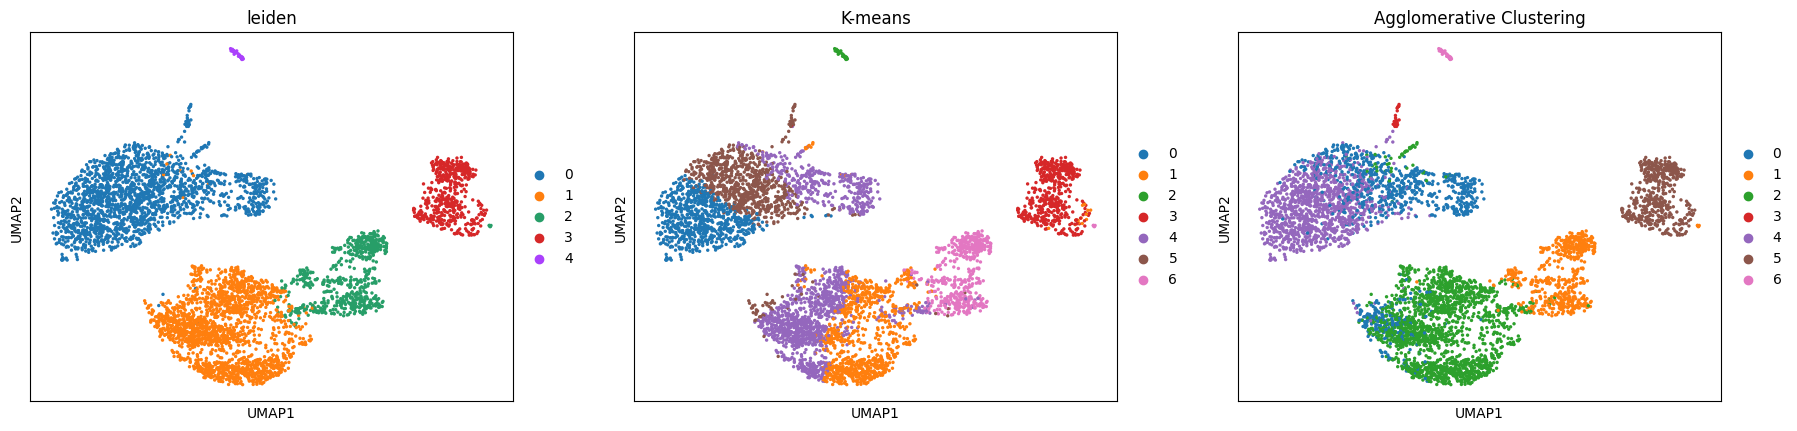

In [ ]:
sc.tl.leiden(sample, resolution=0.1)
sc.pp.neighbors(sample, n_neighbors=40)
sc.tl.umap(adata, min_dist=0.8)
sc.pl.umap(
    sample,
    color=['leiden', 'K-means', 'Agglomerative Clustering']
)

In [ ]:
comp_SC()

Avg Silhouette Score for UMAP clusters: 0.5510


Avg Silhouette Score показывает, насколько обьекты внутри одного кластера похожи друг на друга в сравнении с объектами других кластеров.

Если значение близко к единице, то точки явно разделимы. Значение около нуля означает, что полученные кластеры могут пересекаться, а значение -1 означает, что мы ошиблись в выборе меток кластеров.

Считается, что хороший Avg Silhouette Score >= 0.5, поэтому уже неплохо

# Анализ кластеров

In [ ]:
sample

AnnData object with n_obs × n_vars = 5000 × 3125
    obs: 'n_genes_by_counts', 'total_counts', 'n_genes', 'total_counts_mt', 'pct_counts_mt', 'K-means', 'Agglomerative Clustering', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'mt', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'neighbors', 'umap', 'pca', 'leiden', 'leiden_colors', 'K-means_colors', 'Agglomerative Clustering_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

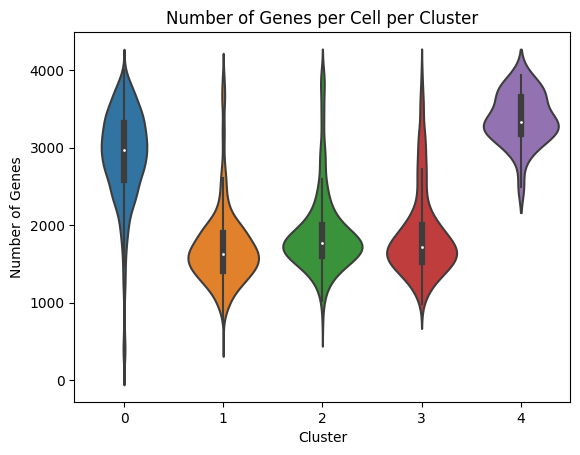

In [ ]:
import seaborn as sns

sns.violinplot(x='leiden', y='n_genes', data=sample.obs)
plt.title('Number of Genes per Cell per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Genes')
plt.show()

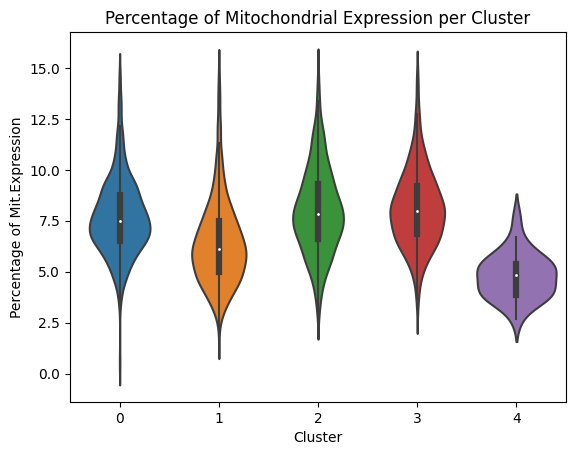

In [ ]:
sample.obs['percent_mito'] = (sample.obs['total_counts_mt'] /
                              sample.obs['total_counts']) * 100

sns.violinplot(x='leiden', y='percent_mito', data=sample.obs)
plt.title('Percentage of Mitochondrial Expression per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Percentage of Mit.Expression')
plt.show()

# 10 наиболее экспрессированных генов по кластерам

In [ ]:
sc.tl.rank_genes_groups(sample, groupby='leiden', method='t-test', n_genes=sample.shape[1])

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)


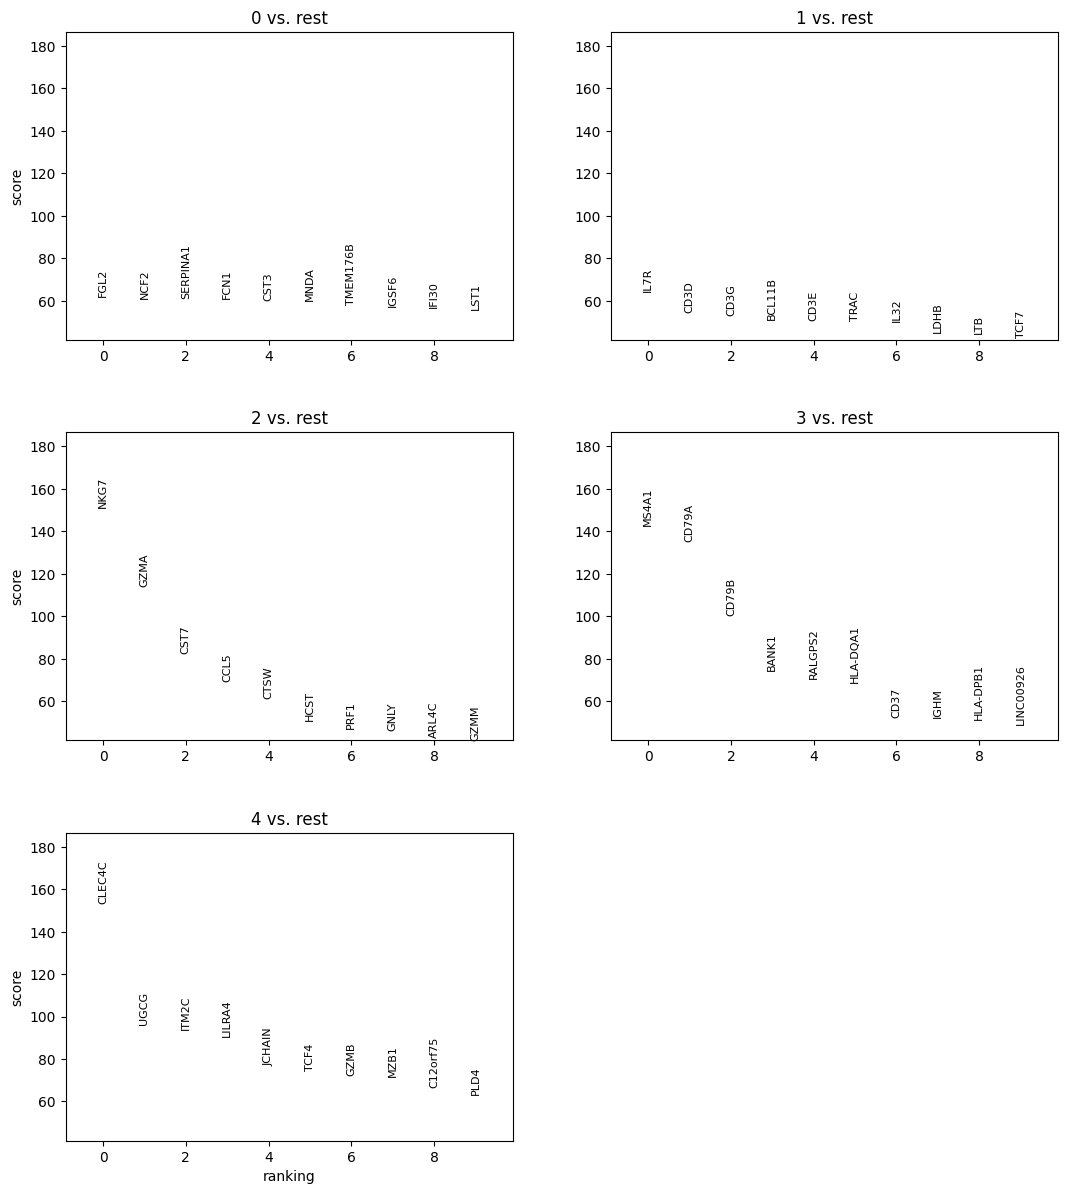

In [ ]:
sc.pl.rank_genes_groups(sample, n_genes=10, ncols=2)

Наиболее экспрессированные гены по кластерам отличаются, что хорошо -- это сказывается на кластеризации, если бы совпадало в двух кластерах, было бы странновато (и вероятно количество кластеров подобрано не очень хорошо)

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden']`


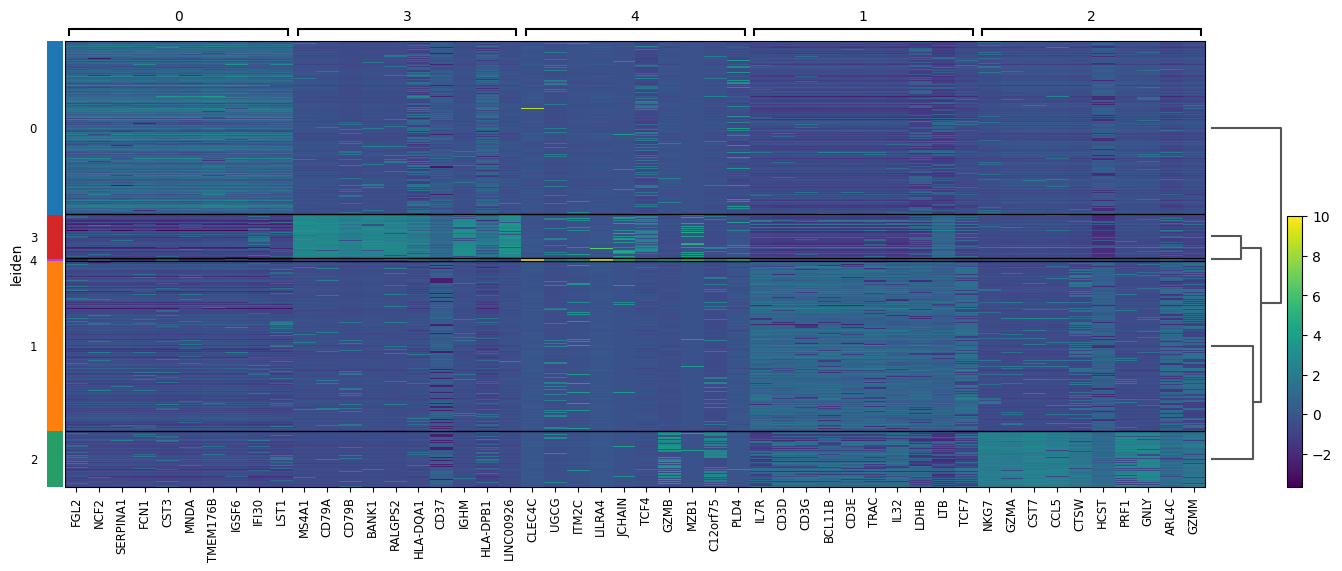

In [ ]:
sc.pl.rank_genes_groups_heatmap(sample, n_genes=10, groupby='leiden', use_raw=False)

Посмотрим еще графики, потому что почему бы и нет..

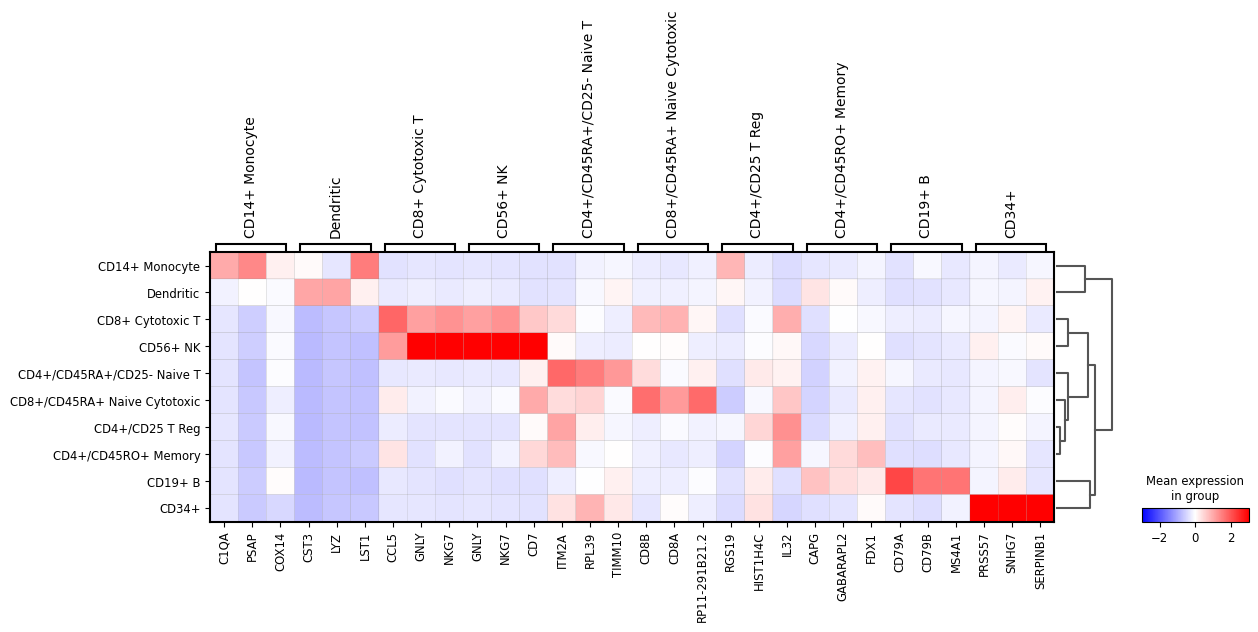

In [ ]:
sc.pl.rank_genes_groups_matrixplot(pbmc, n_genes=3, use_raw=False, vmin=-3, vmax=3, cmap='bwr')

In [ ]:
pbmc = sc.datasets.pbmc68k_reduced()
pbmc

AnnData object with n_obs × n_vars = 700 × 765
    obs: 'bulk_labels', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'louvain'
    var: 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'bulk_labels_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

Построим графики для наиболее экспрессированных для каждого кластера

In [ ]:
ranked_genes = pd.DataFrame(sample.uns['rank_genes_groups']['names']).head(10)

In [ ]:
ranked_genes

,0,1,2,3,4
0,FGL2,IL7R,NKG7,MS4A1,CLEC4C
1,NCF2,CD3D,GZMA,CD79A,UGCG
2,SERPINA1,CD3G,CST7,CD79B,ITM2C
3,FCN1,BCL11B,CCL5,BANK1,LILRA4
4,CST3,CD3E,CTSW,RALGPS2,JCHAIN
5,MNDA,TRAC,HCST,HLA-DQA1,TCF4
6,TMEM176B,IL32,PRF1,CD37,GZMB
7,IGSF6,LDHB,GNLY,IGHM,MZB1
8,IFI30,LTB,ARL4C,HLA-DPB1,C12orf75
9,LST1,TCF7,GZMM,LINC00926,PLD4


In [ ]:
top_genes = ranked_genes.iloc[0]
print(top_genes)

0      FGL2
1      IL7R
2      NKG7
3     MS4A1
4    CLEC4C
Name: 0, dtype: object


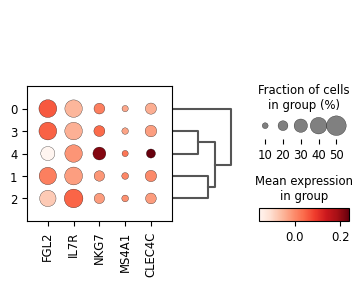

In [ ]:
sc.pl.dotplot(sample,
              var_names=top_genes,
              groupby='leiden',
              dendrogram=True,
              show=False)
plt.show()

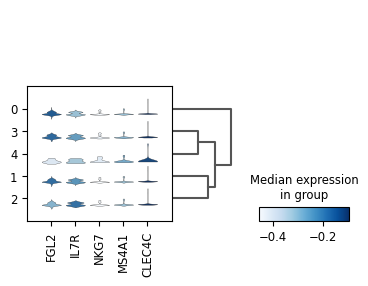

In [ ]:
ax = sc.pl.stacked_violin(sample, top_genes,
                          groupby='leiden', swap_axes=False, dendrogram=True)

# Реализация алгоритма К-средних

K-средних – это один из наиболее известных алгоритмов кластеризации, в котором каждый кластер определяется своим центром тяжести

Алгоритм K-Means направлен на разбиение набора объектов на основе их содержимого/характеристик на k кластеров, где k - предопределенная или определяемая пользователем константа

Значение k устанавливается в начале алгоритма и представляет собой количество кластеров, которые должны быть получены. Для группировки n объектов в k кластер, k-центры инициализируются случайным образом. Каждый раз, когда появляются данные, они немедленно присваиваются ближайшему кластеру, и центр этого кластера обновляется

Процесс продолжается до тех пор, пока значение центра в каждом кластере не изменится. Центр кластера формируется таким образом, чтобы он тесно связывался (с точки зрения функции подобия) со всеми объектами в этом кластере. Наконец, элементы, принадлежащие к одному кластеру, близки друг к другу и не похожи на элементы, принадлежащие к другому кластеру

Есть и улучшенные версии алгоритма: например, k-средних++, в котором улучшено определение центроидов (он как раз дефолтный в sklearn)

In [ ]:
import pandas as pd
import random as rand
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [ ]:
center_function = lambda x: x - x.mean()
data_centered = center_function(sample.X)
pca = PCA(n_components=10)
data_main = pca.fit_transform(data_centered)

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def kmeans(x, k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    # выбираем центроиды
    centroids = x[idx, :]

    # считаем расстояния
    distances = cdist(x, centroids ,'euclidean')

    # центроиды с мин расстоянием
    points = np.array([np.argmin(i) for i in distances])
    for _ in range(no_of_iterations):
        centroids = []
        for idx in range(k):
            temp_cent = x[points==idx].mean(axis=0)
            centroids.append(temp_cent)

        centroids = np.vstack(centroids)

        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])

    return points

label = kmeans(data_main,10,300)

In [ ]:
sample.obs['clust_k_means'] = label

In [ ]:
from matplotlib.pyplot import rc_context

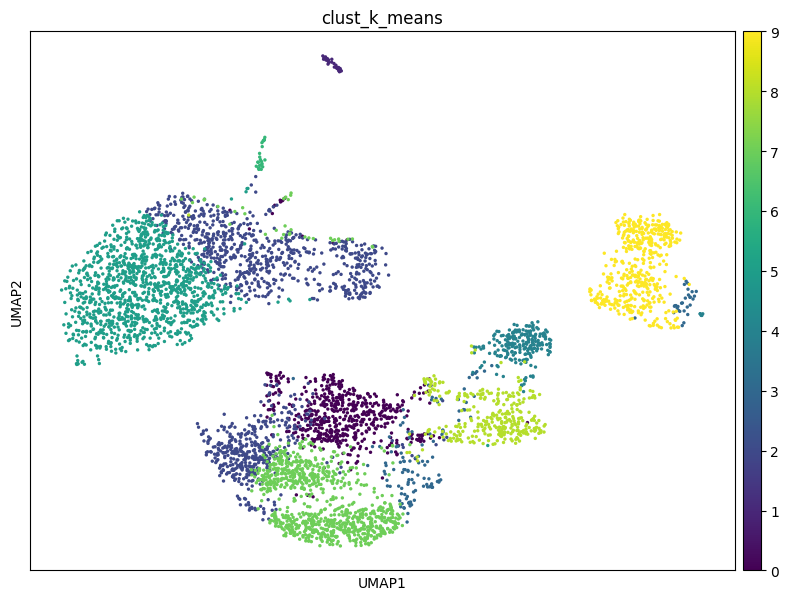

In [ ]:
with rc_context({'figure.figsize': (10, 7)}):
    sc.pl.umap(sample, color='clust_k_means')

 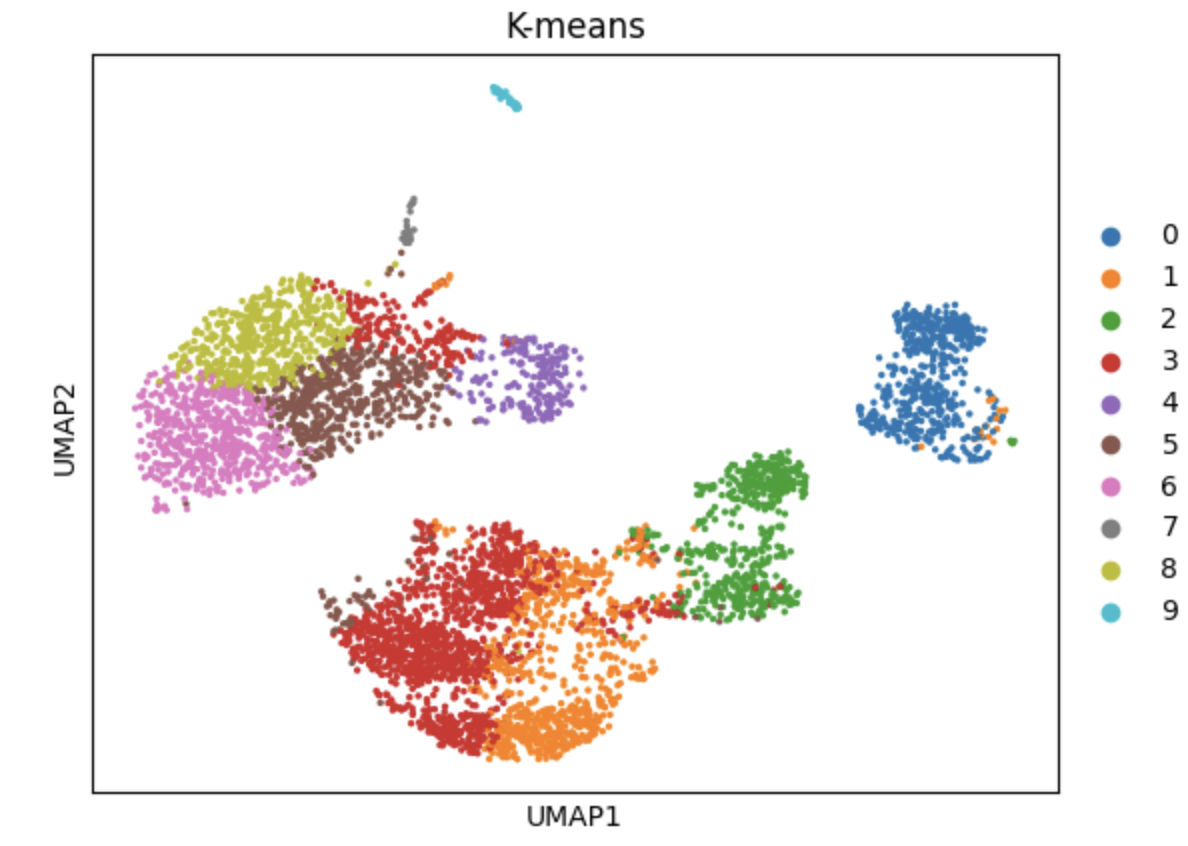

Результат такой же как тот, который был получен для К-средних в бейзлайновой кластеризации, так что можно сказать, что с реализацией алгоритма все ок


# Extra points [1.5]



* [1] Choose 3 clusters of interest and try to make a guess about their cell type based on the top-expressed genes. For example, look for information on whether such high expression of a certain gene is typical of some cell type.

* [0.5]  You worked hard to get here, and we hope you learned something new! To get these bonus points, please describe your impressions of this course, constructive suggestions, and attach a funny meme (about your favourite field, like ML or molecular biology) \
 **Please note that if the meme is not funny, no points will be awarded!**